In [87]:
# https://deeplearningcourses.com/c/artificial-intelligence-reinforcement-learning-in-python
# https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
from grid_world import standard_grid, negative_grid
from iterative_policy_evaluation import print_values, print_policy

SMALL_ENOUGH = 1e-3
GAMMA = 0.9
ALL_POSSIBLE_ACTIONS = ('U', 'D', 'L', 'R')
count = 0
result_array = np.array([])
# this is deterministic
# all p(s',r|s,a) = 1 or 0

if __name__ == '__main__':
  # this grid gives you a reward of -0.1 for every non-terminal state
  # we want to see if this will encourage finding a shorter path to the goal
  grid = negative_grid()

  # print rewards
  print("rewards:")
  print_values(grid.rewards, grid)

  # state -> action
  # we'll randomly choose an action and update as we learn
  policy = {}
  for s in grid.actions.keys():
    policy[s] = np.random.choice(ALL_POSSIBLE_ACTIONS)

  # initial policy
  print("initial policy:")
  print_policy(policy, grid)

  # initialize V(s)
  V = {}
  states = grid.all_states()
  for s in states:
    # V[s] = 0
    if s in grid.actions:
      V[s] = .5
    else:
      # terminal state
      V[s] = 0
  
  # repeat until convergence - will break out when policy does not change
  while True:

    # policy evaluation step - we already know how to do this!
    while True:
      
      
      biggest_change = 0
      
      for s in states:
        old_v = V[s]
        
        # V(s) only has value if it's not a terminal state
        if s in policy:
          count = count +1
          a = policy[s]
          grid.set_state(s)
          r = grid.move(a)
          V[s] = r + GAMMA * V[grid.current_state()]
          biggest_change = max(biggest_change, np.abs(old_v - V[s]))
          
          if biggest_change < SMALL_ENOUGH:
                biggest_change = -.5
          result_array = np.append(result_array, biggest_change)
          # print(biggest_change)
          # print("a",a, "r",r, V[s],"state", s)
      if biggest_change < SMALL_ENOUGH:
        print("biggest_change when converged:",biggest_change)
        break
   
    # policy improvement step
    is_policy_converged = True
    for s in states:
      
      if s in policy:
        
        old_a = policy[s]
        new_a = None
        best_value = float('-inf')
        # loop through all possible actions to find the best current action
        for a in ALL_POSSIBLE_ACTIONS:
          grid.set_state(s)
          r = grid.move(a)
          v = r + GAMMA * V[grid.current_state()]
          
            #print("v:",v)
          if v > best_value:
            best_value = v
            new_a = a
            #print(v)
        policy[s] = new_a
        
        if new_a != old_a:
          is_policy_converged = False

    if is_policy_converged:
      break

  print("values:")
  print_values(V, grid)
  print("policy:")
  print_policy(policy, grid)


rewards:
---------------------------
-0.10|-0.10|-0.10| 1.00|
---------------------------
-0.10| 0.00|-0.10|-1.00|
---------------------------
-0.10|-0.10|-0.10|-0.10|
initial policy:
---------------------------
  R  |  U  |  L  |     |
---------------------------
  D  |     |  L  |     |
---------------------------
  D  |  U  |  L  |  L  |
biggest_change when converged: -0.5
biggest_change when converged: -0.5
biggest_change when converged: -0.5
biggest_change when converged: -0.5
biggest_change when converged: -0.5
values:
---------------------------
 0.62| 0.80| 1.00| 0.00|
---------------------------
 0.46| 0.00| 0.80| 0.00|
---------------------------
 0.31| 0.46| 0.62| 0.46|
policy:
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  U  |  R  |  U  |  L  |


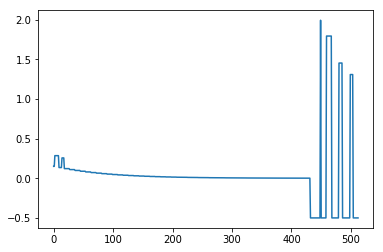

In [88]:
import matplotlib.pyplot as plt
plt.plot(result_array)
plt.show()

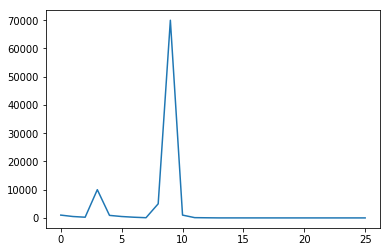

In [9]:
88000*20

1760000

In [10]:
63/1.75


36.0

In [11]:
36*88000

3168000

In [12]:
4100000*.03

123000.0

In [13]:
15+15+80+20

130

In [14]:
(80*18.5)+(50*27.75)

2867.5

In [15]:
.75*2867

2150.25

In [11]:
import numpy as np
np.random.choice(('U', 'D', 'L', 'R'))

'L'

In [14]:
negative_grid()

In [23]:
count = 0
count += 1
count += 1

In [24]:
count

2

In [35]:
(np.random.random(1000))


array([5.87689944e-01, 3.49823463e-01, 8.00251103e-01, 5.76948435e-02,
       1.97704849e-01, 2.49739391e-01, 9.92844881e-01, 1.90859322e-02,
       7.43150254e-01, 4.12122314e-01, 3.93006635e-01, 7.01616428e-02,
       2.26372407e-01, 7.22949802e-01, 5.62215968e-03, 8.93482695e-01,
       8.55887966e-01, 5.31688050e-02, 4.80430821e-01, 5.06165444e-01,
       7.44299422e-01, 8.27611000e-01, 7.95384286e-01, 1.18468864e-01,
       2.40187605e-01, 2.55002970e-01, 9.28602438e-01, 5.18377258e-01,
       6.07215380e-02, 2.22208665e-01, 4.07500324e-01, 9.15979526e-02,
       8.53357869e-01, 8.41922155e-01, 3.16074842e-01, 8.35420719e-01,
       3.77117796e-01, 6.46863268e-01, 8.33637452e-01, 7.05358195e-01,
       5.26051422e-01, 1.52581539e-01, 2.96704072e-01, 2.68878748e-01,
       5.98580756e-01, 8.61539336e-01, 9.44047804e-01, 8.62286562e-01,
       8.27156935e-01, 2.17110077e-01, 3.98407880e-02, 7.01032652e-01,
       9.75721202e-01, 6.73606292e-01, 2.31615385e-01, 7.38054084e-01,
      